In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Uploading the dataset

In [ ]:
data = pd.read_csv("/content/train_exit.csv")
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [ ]:
data.shape

(13994, 30)

In [ ]:
data["age"].unique()

array([23, 18, 16, 27, 19, 21, 24, 25, 17, 29, 20, 28, 22, 26, 32, 31, 51,
       30, 36, 34, 33, 52, 57, 54, 35, 50, 39, 49, 55, 53, 48, 59, 60, 37,
       58, 61, 38, 56, 40])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [ ]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


<ipython-input-146-80d9fdba2f09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

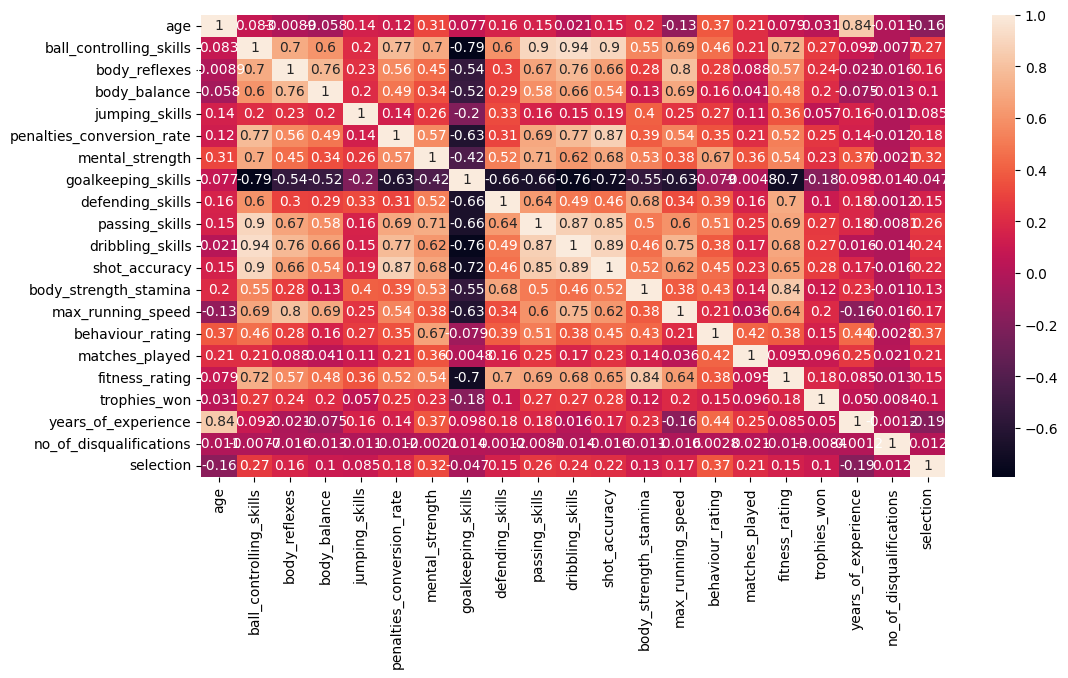

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data['matches_played'].replace(['NaN'],['0'],inplace=True)

In [ ]:
data["matches_played"].unique()

array([nan,  0.,  1., 37., 39., 75., 73., 36., 76., 38.])

In [ ]:
data["matches_played"].value_counts()

0.0     7498
1.0     2534
39.0      14
36.0      11
37.0       8
38.0       7
73.0       4
76.0       3
75.0       2
Name: matches_played, dtype: int64

In [ ]:
data['fitness_rating'].replace(['NaN'],['0'],inplace=True)

In [ ]:
data["fitness_rating"].unique()

array([ 8.1,  nan,  6.6,  8.6,  5.7,  6.9,  7.3,  6.8,  8.2,  6.1,  7.5,
        6.2,  6.7,  9.7,  5.2,  7.7,  7.6,  3.1,  7.4,  8.7,  6.5,  9. ,
        3.4,  5. ,  8.3,  5.3,  5.4,  7. ,  6.4,  5.6,  9.6,  4.5,  6. ,
        2.1,  9.4,  1.9,  7.2,  5.9,  2.6,  4.9,  7.1,  2.3,  3.2,  1.5,
        8. ,  8.8,  5.5,  7.9,  8.9,  8.5,  8.4,  5.1,  2.4,  4.4,  3.9,
        4.8,  9.1,  3.5,  2.8,  3. ,  5.8,  4. ,  2.9,  2.5,  9.2,  4.2,
        3.7,  2. ,  1.4,  4.3,  1.6,  4.6,  9.5,  2.7,  4.1,  1.8,  1.3,
        2.2,  3.6,  3.8,  9.8,  1.2,  9.9,  1. , 10. ,  1.1])

In [ ]:
data['behaviour_rating'].replace(['nan'],['0'],inplace=True)

In [ ]:
data["behaviour_rating"].unique()

array([7.7, 5.3, 4.7, 8.6, nan, 6.3, 6.9, 5.9, 8.1, 5.1, 5.6, 5.2, 4.4,
       8.3, 6.4, 6.8, 6.6, 6.2, 5.7, 5. , 7.5, 5.4, 4. , 8. , 7.2, 7.4,
       4.5, 4.1, 7.8, 6.5, 7. , 4.2, 6. , 3.4, 4.8, 7.1, 2.9, 4.6, 7.6,
       2.3, 5.8, 3.9, 3.5, 2.7, 3.3, 3.6, 2.8, 3. , 3.2, 2.4, 3.8, 8.7,
       8.2, 9.3, 8.4, 8.9, 2.6, 9.4, 8.8, 9.5, 2.1, 9. , 2.2, 9.8, 9.6])

### EDA

<Axes: xlabel='coaching', ylabel='count'>

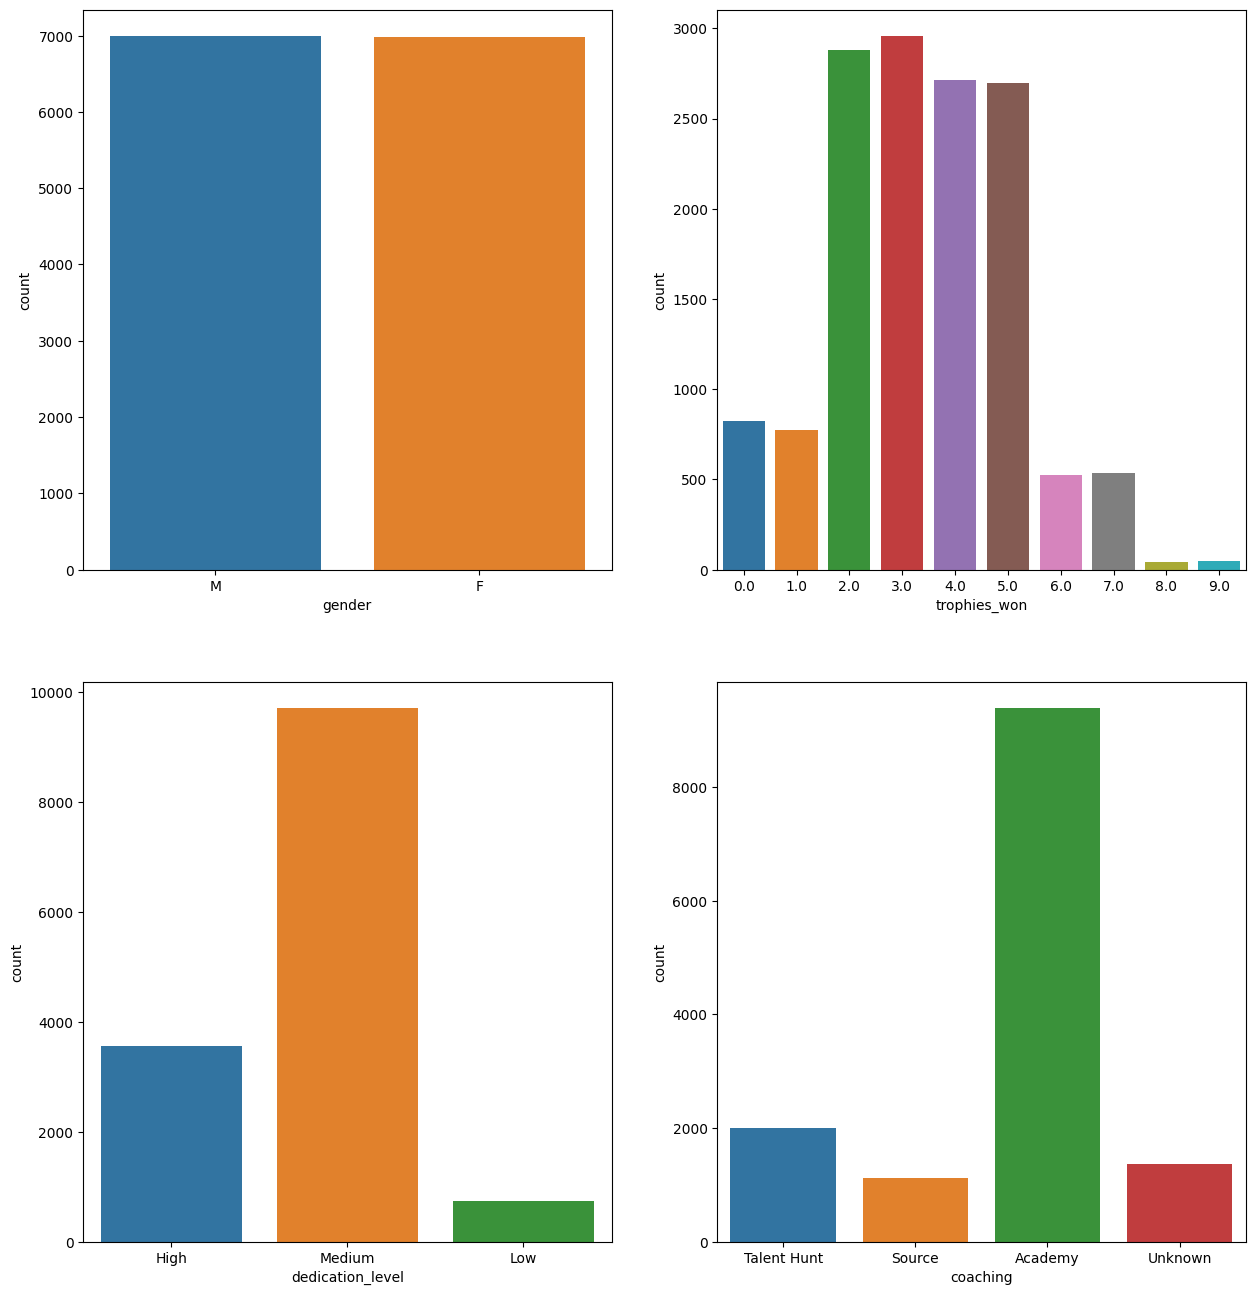

In [ ]:
fig,ax = plt.subplots(2,2 ,figsize=(15,16))
sns.countplot(x=data["gender"],ax=ax[0,0])
sns.countplot(x=data["trophies_won"],ax=ax[0,1])
sns.countplot(x=data["dedication_level"],ax=ax[1,0])
sns.countplot(x=data["coaching"],ax=ax[1,1])



<Axes: xlabel='gender', ylabel='count'>

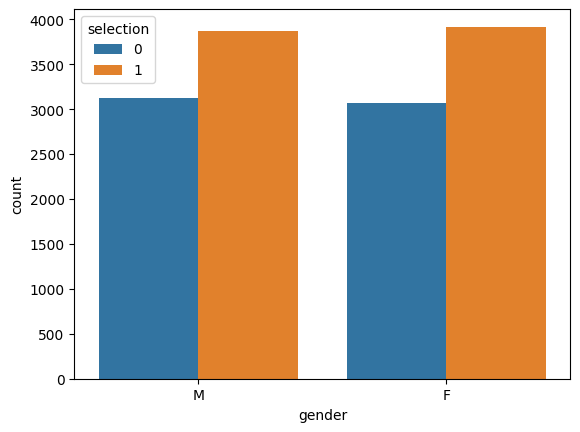

In [ ]:
sns.countplot(x='gender',hue="selection",data=data)

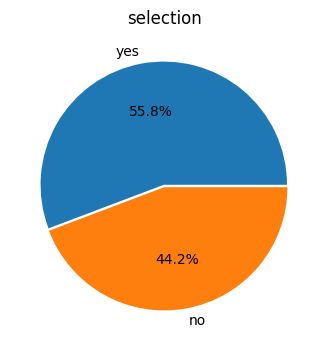

In [ ]:
num = data["selection"].value_counts()
fig = plt.figure(figsize =(10, 4))
plt.pie( num,labels = ["yes","no"], explode = [0.01,0.01] ,autopct ="%1.1f%%")
plt.title("selection")
plt.show()

### Preprocessing

In [ ]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [ ]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

### Filling null values

In [ ]:
data['gender'].fillna(method="ffill",inplace=True)
data["weight"].fillna(method="ffill",inplace=True)
data["ball_controlling_skills"].fillna(method="ffill",inplace=True)
data['jumping_skills'].fillna(method="ffill",inplace=True)
data['penalties_conversion_rate'].fillna(method="bfill",inplace=True)
data['mental_strength'].fillna(method="ffill",inplace=True)
data['shot_accuracy'].fillna(method="ffill",inplace=True)
data['strong_foot'].fillna(method="ffill",inplace=True)
data['behaviour_rating'].fillna(method="ffill",inplace=True)
data['matches_played'].fillna(method="bfill",inplace=True)
data['fitness_rating'].fillna(method="ffill",inplace=True)
data['years_of_experience'].fillna(method="ffill",inplace=True)
data['coaching'].fillna(method="ffill",inplace=True)

In [ ]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

### Box plot

<ipython-input-155-0cfba3b9a9f0>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


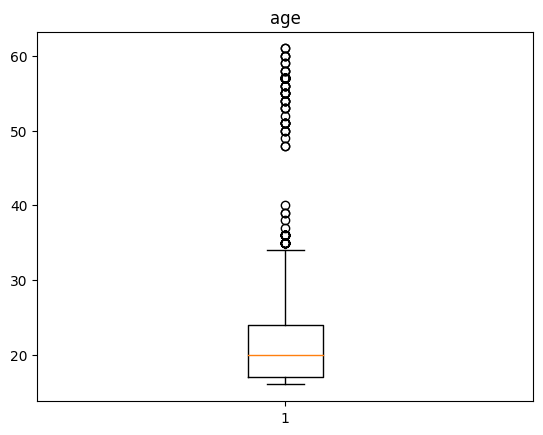

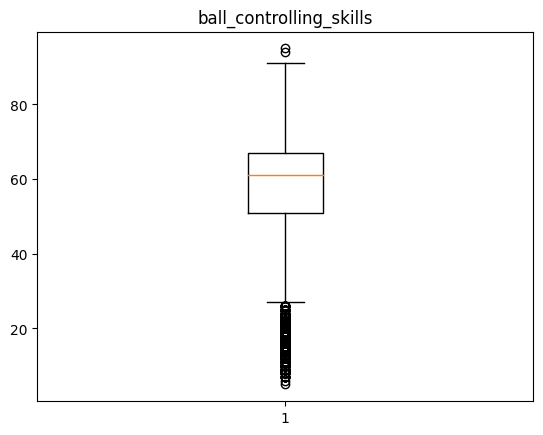

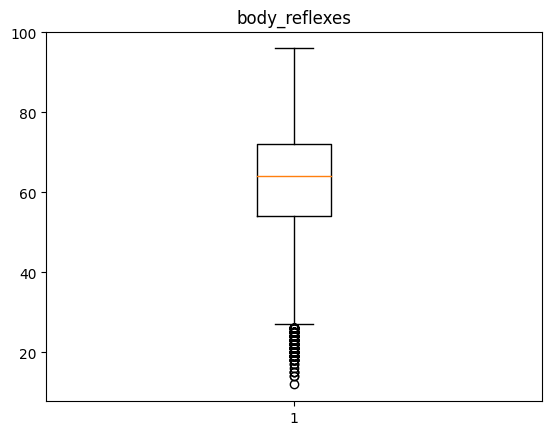

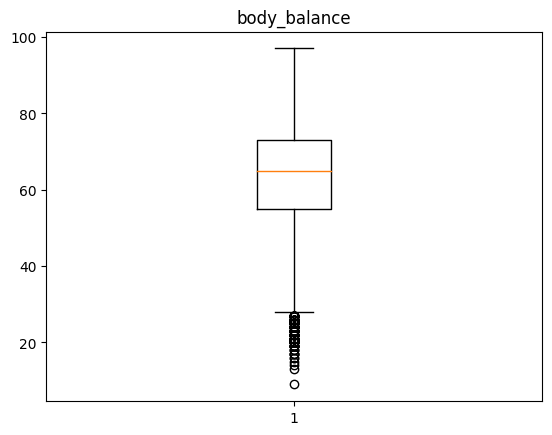

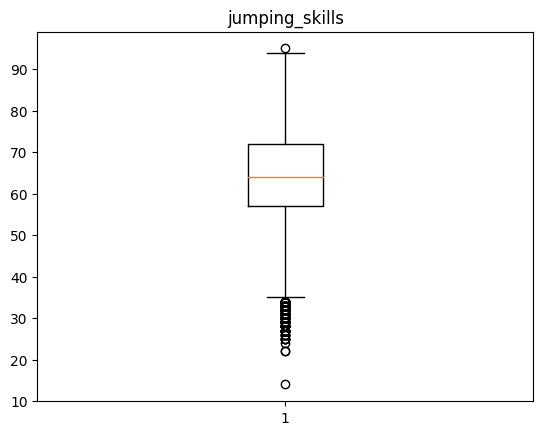

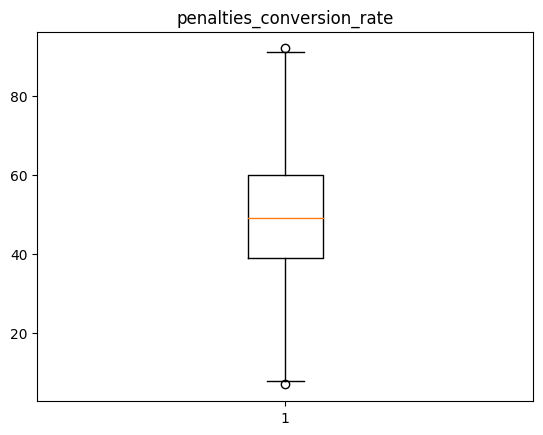

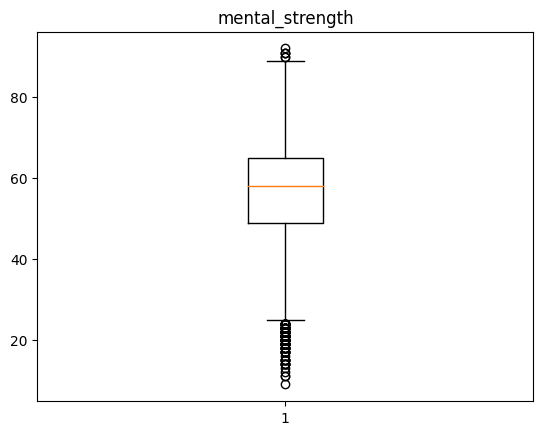

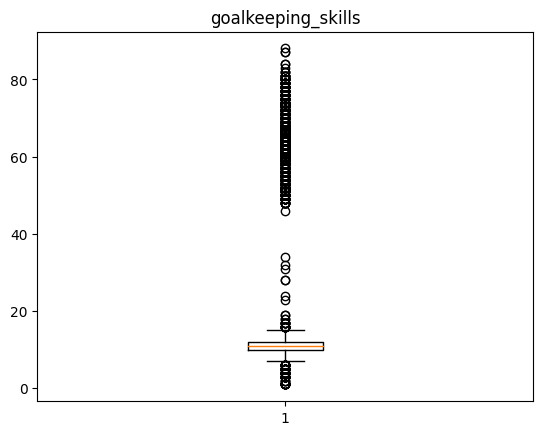

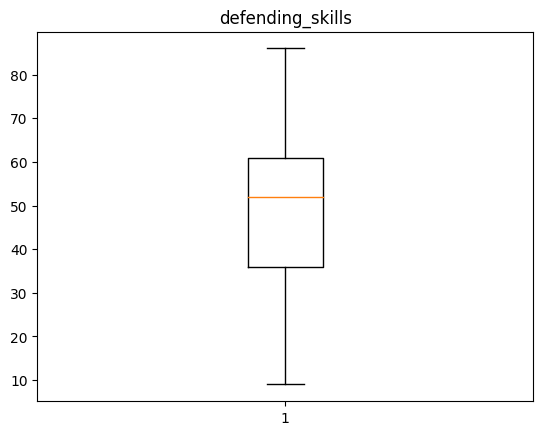

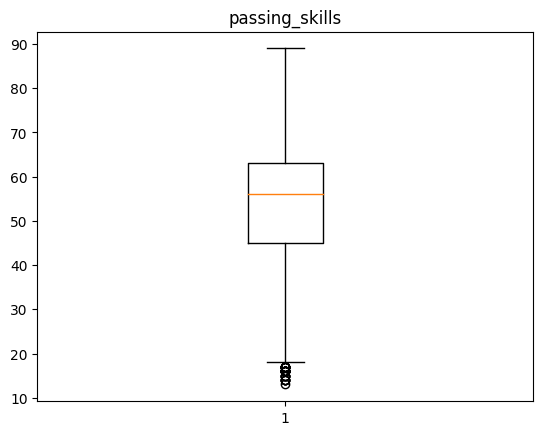

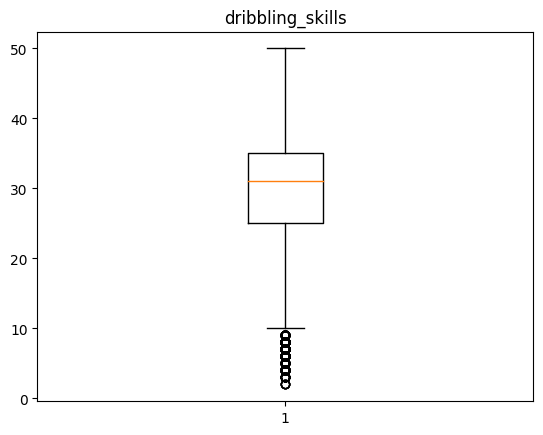

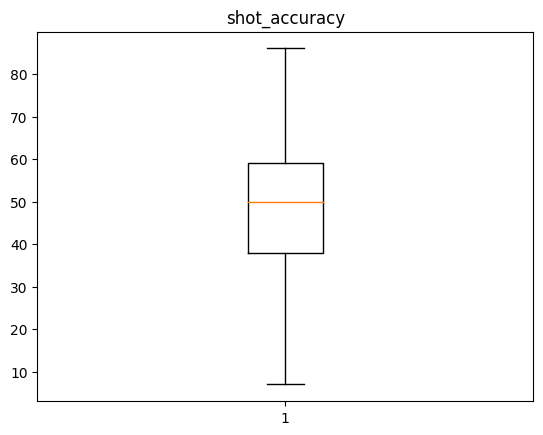

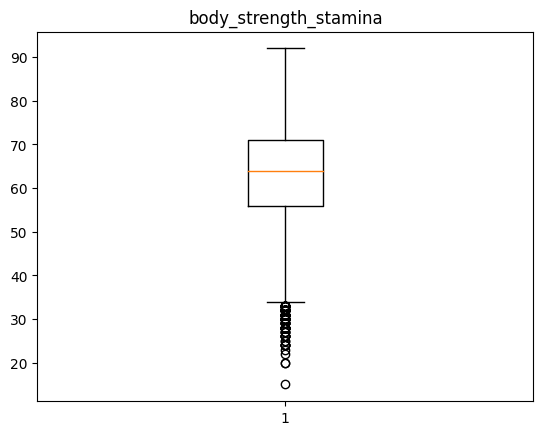

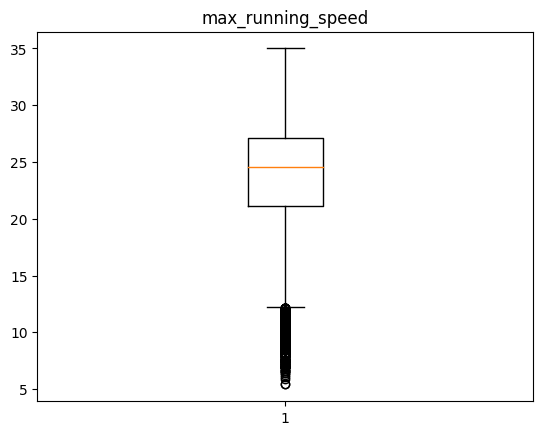

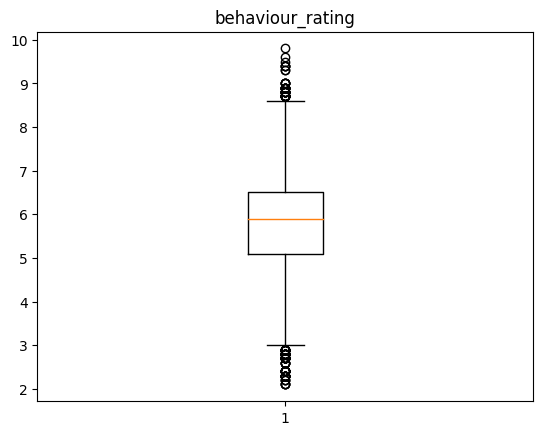

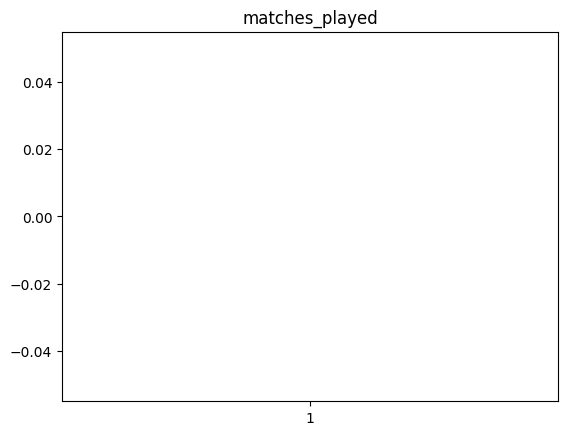

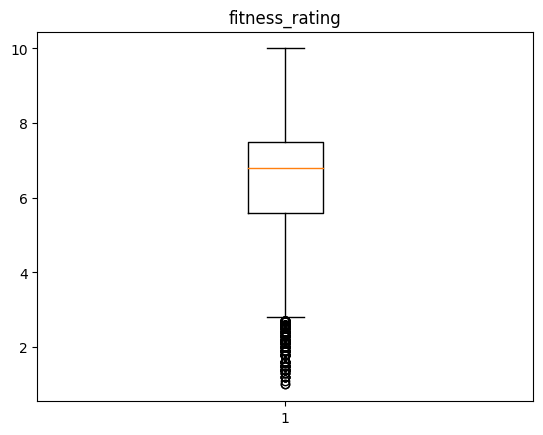

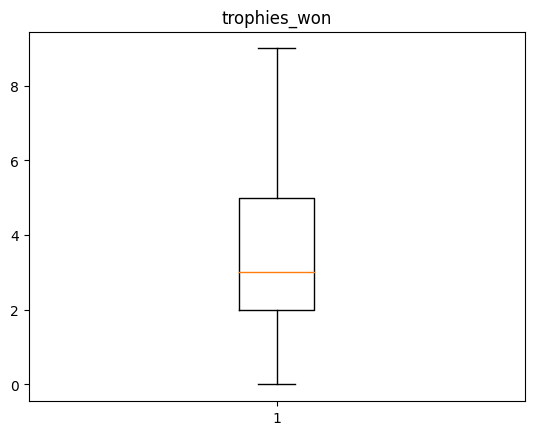

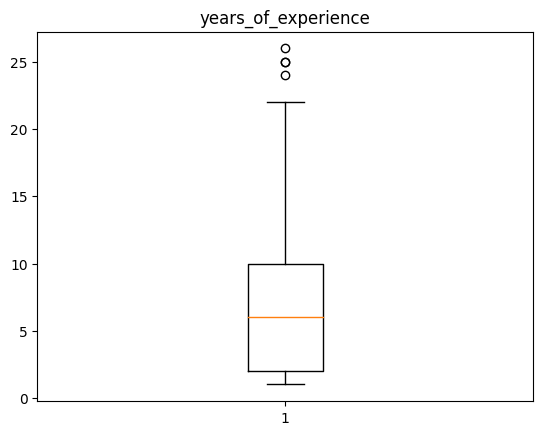

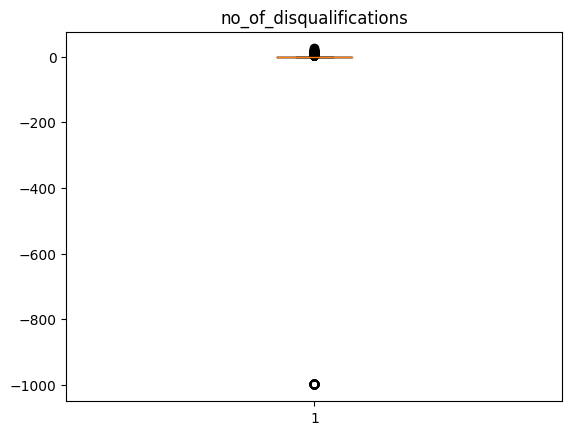

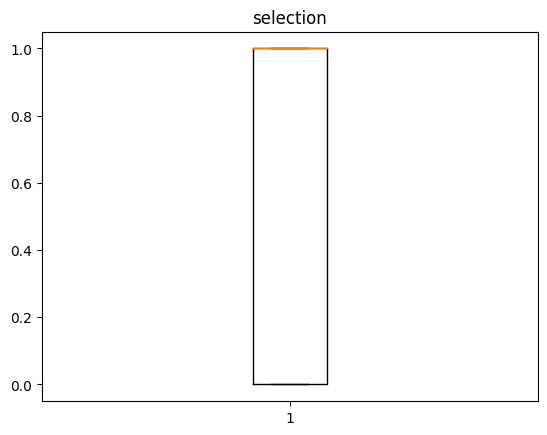

In [ ]:
num_col = [ 'age',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed',  'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications',
       'selection']
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1 = np.percentile(data["age"],25,method= 'midpoint')
Q2 = np.percentile(data["age"],50,method= 'midpoint')
Q3 = np.percentile(data["age"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 17.0
q2 is 20.0
q3 is 24.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 6.5
max is 34.5


In [ ]:
outlier = []
for x in data["age"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[51,
 36,
 36,
 52,
 57,
 54,
 57,
 57,
 57,
 35,
 54,
 50,
 36,
 36,
 57,
 39,
 49,
 36,
 55,
 57,
 53,
 35,
 57,
 35,
 55,
 57,
 57,
 36,
 54,
 48,
 35,
 36,
 36,
 59,
 53,
 60,
 55,
 48,
 36,
 57,
 35,
 36,
 37,
 57,
 57,
 59,
 36,
 35,
 35,
 54,
 57,
 57,
 36,
 57,
 57,
 35,
 57,
 57,
 58,
 51,
 57,
 57,
 35,
 61,
 55,
 60,
 39,
 51,
 57,
 51,
 57,
 57,
 57,
 38,
 55,
 56,
 57,
 57,
 60,
 57,
 57,
 51,
 50,
 56,
 57,
 36,
 58,
 50,
 57,
 57,
 35,
 57,
 57,
 57,
 57,
 61,
 53,
 57,
 35,
 35,
 57,
 57,
 36,
 57,
 58,
 35,
 57,
 57,
 57,
 57,
 35,
 35,
 55,
 56,
 40,
 57,
 35,
 56,
 51]

In [ ]:
ind1 = data["age"]>up_lim
data.loc[ind1].index

Int64Index([   75,   130,   235,   545,   607,   613,   668,   712,   714,
              737,
            ...
            12751, 12829, 12858, 12936, 13020, 13218, 13237, 13312, 13344,
            13954],
           dtype='int64', length=119)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["ball_controlling_skills"],25,method= 'midpoint')
Q2 = np.percentile(data["ball_controlling_skills"],50,method= 'midpoint')
Q3 = np.percentile(data["ball_controlling_skills"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 51.0
q2 is 61.0
q3 is 67.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 27.0
max is 91.0


In [ ]:
outlier = []
for x in data["ball_controlling_skills"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[16.0,
 17.0,
 19.0,
 19.0,
 20.0,
 18.0,
 25.0,
 17.0,
 9.0,
 17.0,
 10.0,
 24.0,
 17.0,
 20.0,
 20.0,
 21.0,
 15.0,
 21.0,
 13.0,
 18.0,
 18.0,
 25.0,
 13.0,
 16.0,
 11.0,
 10.0,
 13.0,
 10.0,
 10.0,
 20.0,
 25.0,
 22.0,
 23.0,
 10.0,
 19.0,
 11.0,
 18.0,
 12.0,
 10.0,
 9.0,
 12.0,
 11.0,
 13.0,
 8.0,
 17.0,
 14.0,
 21.0,
 20.0,
 8.0,
 15.0,
 18.0,
 20.0,
 21.0,
 15.0,
 22.0,
 22.0,
 19.0,
 14.0,
 25.0,
 16.0,
 10.0,
 20.0,
 14.0,
 11.0,
 15.0,
 15.0,
 17.0,
 24.0,
 10.0,
 22.0,
 21.0,
 9.0,
 16.0,
 18.0,
 14.0,
 18.0,
 12.0,
 21.0,
 20.0,
 18.0,
 17.0,
 25.0,
 18.0,
 17.0,
 16.0,
 16.0,
 18.0,
 22.0,
 22.0,
 17.0,
 17.0,
 23.0,
 23.0,
 16.0,
 13.0,
 16.0,
 22.0,
 15.0,
 20.0,
 10.0,
 22.0,
 19.0,
 20.0,
 14.0,
 17.0,
 17.0,
 10.0,
 16.0,
 19.0,
 17.0,
 17.0,
 20.0,
 15.0,
 11.0,
 17.0,
 20.0,
 13.0,
 22.0,
 13.0,
 21.0,
 17.0,
 25.0,
 20.0,
 20.0,
 16.0,
 12.0,
 12.0,
 15.0,
 15.0,
 12.0,
 14.0,
 8.0,
 13.0,
 12.0,
 19.0,
 11.0,
 15.0,
 17.0,
 13.0,
 16.0,
 23.0,
 15.0,
 18.0,
 11.0

In [ ]:
ind1 = data["ball_controlling_skills"]<low_lim
data.loc[ind1].index

Int64Index([   32,    48,    51,    52,    53,    58,    79,    86,   122,
              128,
            ...
            13923, 13925, 13927, 13933, 13945, 13946, 13947, 13964, 13969,
            13975],
           dtype='int64', length=1473)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["body_reflexes"],25,method= 'midpoint')
Q2 = np.percentile(data["body_reflexes"],50,method= 'midpoint')
Q3 = np.percentile(data["body_reflexes"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 57.0
q2 is 66.0
q3 is 73.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 33.0
max is 97.0


In [ ]:
outlier = []
for x in data["body_reflexes"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[31.0,
 26.0,
 31.0,
 32.0,
 31.0,
 31.0,
 32.0,
 30.0,
 29.0,
 30.0,
 29.0,
 28.0,
 23.0,
 29.0,
 32.0,
 30.0,
 31.0,
 29.0,
 31.0,
 28.0,
 30.0,
 31.0,
 32.0,
 32.0,
 32.0,
 32.0,
 31.0,
 31.0,
 30.0,
 31.0,
 32.0,
 27.0,
 30.0,
 32.0,
 28.0,
 29.0,
 27.0,
 29.0,
 32.0,
 30.0,
 30.0,
 31.0,
 30.0,
 28.0,
 32.0,
 19.0,
 27.0,
 32.0,
 32.0,
 28.0,
 31.0,
 30.0,
 28.0,
 28.0,
 30.0,
 30.0,
 30.0,
 30.0,
 28.0,
 29.0,
 32.0,
 30.0,
 27.0,
 29.0,
 25.0,
 32.0,
 28.0,
 29.0,
 30.0,
 29.0,
 31.0,
 23.0,
 32.0,
 30.0,
 30.0,
 31.0,
 23.0,
 28.0,
 29.0,
 30.0,
 32.0,
 29.0,
 29.0,
 31.0,
 30.0,
 25.0,
 31.0,
 29.0,
 32.0,
 32.0,
 28.0,
 32.0,
 32.0,
 29.0,
 27.0,
 29.0,
 32.0,
 31.0,
 30.0,
 32.0,
 28.0,
 29.0,
 30.0,
 32.0,
 28.0,
 32.0,
 32.0,
 29.0,
 31.0,
 27.0,
 29.0,
 30.0,
 31.0,
 31.0,
 31.0,
 31.0,
 30.0,
 31.0,
 31.0,
 32.0,
 26.0,
 30.0,
 29.0,
 31.0,
 30.0,
 32.0,
 28.0,
 31.0,
 30.0,
 32.0,
 31.0,
 32.0,
 30.0,
 26.0,
 29.0,
 30.0,
 26.0,
 32.0,
 31.0,
 30.0,
 32.0,
 32.0,
 31.0,

In [ ]:
ind1 = data["body_reflexes"]<low_lim
data.loc[ind1].index

Int64Index([   36,   113,   141,   189,   211,   268,   291,   314,   357,
              437,
            ...
            13296, 13409, 13444, 13518, 13584, 13601, 13724, 13770, 13854,
            13863],
           dtype='int64', length=204)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["body_balance"],25,method= 'midpoint')
Q2 = np.percentile(data["body_balance"],50,method= 'midpoint')
Q3 = np.percentile(data["body_balance"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 59.0
q2 is 66.0
q3 is 74.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 36.5
max is 96.5


In [ ]:
outlier = []
for x in data["body_balance"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[31.0,
 32.0,
 31.0,
 33.0,
 34.0,
 31.0,
 33.0,
 36.0,
 32.0,
 35.0,
 30.0,
 36.0,
 29.0,
 33.0,
 34.0,
 35.0,
 32.0,
 36.0,
 31.0,
 33.0,
 30.0,
 35.0,
 31.0,
 27.0,
 28.0,
 33.0,
 33.0,
 31.0,
 32.0,
 36.0,
 36.0,
 30.0,
 36.0,
 34.0,
 34.0,
 27.0,
 27.0,
 32.0,
 33.0,
 32.0,
 36.0,
 33.0,
 34.0,
 30.0,
 29.0,
 32.0,
 34.0,
 26.0,
 30.0,
 33.0,
 36.0,
 36.0,
 34.0,
 22.0,
 28.0,
 35.0,
 34.0,
 34.0,
 36.0,
 34.0,
 31.0,
 36.0,
 33.0,
 32.0,
 34.0,
 28.0,
 32.0,
 30.0,
 34.0,
 35.0,
 32.0,
 33.0,
 23.0,
 34.0,
 33.0,
 29.0,
 34.0,
 35.0,
 36.0,
 31.0,
 34.0,
 35.0,
 34.0,
 33.0,
 36.0,
 31.0,
 28.0,
 32.0,
 22.0,
 31.0,
 33.0,
 34.0,
 33.0,
 29.0,
 33.0,
 36.0,
 30.0,
 34.0,
 31.0,
 33.0,
 35.0,
 23.0,
 32.0,
 34.0,
 29.0,
 36.0,
 32.0,
 36.0,
 34.0,
 30.0,
 31.0,
 31.0,
 25.0,
 32.0,
 33.0,
 32.0,
 33.0,
 32.0,
 34.0,
 27.0,
 36.0,
 35.0,
 33.0,
 31.0,
 35.0,
 31.0,
 30.0,
 36.0,
 31.0,
 34.0,
 28.0,
 29.0,
 35.0,
 33.0,
 34.0,
 32.0,
 31.0,
 34.0,
 25.0,
 36.0,
 25.0,
 29.0,
 34.0,

In [ ]:
ind1 = data["body_balance"]<low_lim
data.loc[ind1].index

Int64Index([   49,   143,   173,   194,   275,   281,   333,   395,   432,
              454,
            ...
            13298, 13447, 13479, 13574, 13599, 13609, 13677, 13712, 13735,
            13755],
           dtype='int64', length=229)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["jumping_skills"],25,method= 'midpoint')
Q2 = np.percentile(data["jumping_skills"],50,method= 'midpoint')
Q3 = np.percentile(data["jumping_skills"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 58.0
q2 is 65.0
q3 is 72.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 37.0
max is 93.0


In [ ]:
outlier = []
for x in data["jumping_skills"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[32.0,
 30.0,
 33.0,
 35.0,
 34.0,
 30.0,
 30.0,
 34.0,
 31.0,
 36.0,
 35.0,
 36.0,
 32.0,
 34.0,
 32.0,
 32.0,
 32.0,
 30.0,
 36.0,
 29.0,
 32.0,
 34.0,
 34.0,
 31.0,
 36.0,
 30.0,
 35.0,
 34.0,
 31.0,
 34.0,
 32.0,
 29.0,
 29.0,
 32.0,
 35.0,
 30.0,
 33.0,
 36.0,
 36.0,
 36.0,
 33.0,
 33.0,
 36.0,
 33.0,
 32.0,
 94.0,
 30.0,
 36.0,
 35.0,
 33.0,
 28.0,
 32.0,
 36.0,
 34.0,
 30.0,
 31.0,
 32.0,
 33.0,
 33.0,
 36.0,
 35.0,
 33.0,
 30.0,
 36.0,
 28.0,
 32.0,
 33.0,
 31.0,
 32.0,
 34.0,
 31.0,
 34.0,
 36.0,
 31.0,
 27.0,
 34.0,
 33.0,
 32.0,
 34.0,
 32.0,
 35.0,
 32.0,
 31.0,
 36.0,
 33.0,
 29.0,
 36.0,
 31.0,
 34.0,
 36.0,
 31.0,
 31.0,
 36.0,
 27.0,
 29.0,
 34.0,
 94.0,
 30.0,
 26.0,
 35.0,
 36.0,
 33.0,
 36.0,
 29.0,
 33.0,
 36.0,
 34.0,
 32.0,
 31.0,
 36.0,
 32.0,
 32.0,
 34.0,
 32.0,
 31.0,
 32.0,
 31.0,
 32.0,
 31.0,
 30.0,
 33.0,
 36.0,
 33.0,
 31.0,
 34.0,
 32.0,
 36.0,
 34.0,
 36.0,
 34.0,
 36.0,
 35.0,
 32.0,
 94.0,
 36.0,
 36.0,
 33.0,
 30.0,
 94.0,
 34.0,
 33.0,
 33.0,
 36.0,

In [ ]:
ind1 = data["jumping_skills"]<low_lim
data.loc[ind1].index

Int64Index([   21,    80,   106,   120,   148,   243,   304,   307,   390,
              422,
            ...
            13338, 13442, 13469, 13549, 13612, 13614, 13655, 13726, 13787,
            13798],
           dtype='int64', length=220)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["mental_strength"],25,method= 'midpoint')
Q2 = np.percentile(data["mental_strength"],50,method= 'midpoint')
Q3 = np.percentile(data["mental_strength"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 52.0
q2 is 59.0
q3 is 66.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 31.0
max is 87.0


In [ ]:
outlier = []
for x in data["mental_strength"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier


[27.0,
 90.0,
 91.0,
 30.0,
 30.0,
 25.0,
 91.0,
 28.0,
 18.0,
 88.0,
 88.0,
 29.0,
 88.0,
 29.0,
 30.0,
 29.0,
 30.0,
 22.0,
 28.0,
 92.0,
 25.0,
 27.0,
 22.0,
 29.0,
 27.0,
 91.0,
 90.0,
 29.0,
 88.0,
 89.0,
 27.0,
 88.0,
 29.0,
 21.0]

In [ ]:
ind1 = data["mental_strength"]<low_lim
data.loc[ind1].index

Int64Index([  294,   947,  1050,  1714,  3198,  3323,  3967,  4759,  5220,
             5612,  5729,  6572,  6626,  7383,  7625,  8262,  9047,  9629,
            10855, 13224, 13811, 13952],
           dtype='int64')

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["goalkeeping_skills"],25,method= 'midpoint')
Q2 = np.percentile(data["goalkeeping_skills"],50,method= 'midpoint')
Q3 = np.percentile(data["goalkeeping_skills"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 10.0
q2 is 11.0
q3 is 12.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 7.0
max is 15.0


In [ ]:
outlier = []
for x in data["goalkeeping_skills"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[3.0,
 3.0,
 16.0,
 4.0,
 5.0,
 63.0,
 3.0,
 5.0,
 79.0,
 61.0,
 59.0,
 16.0,
 76.0,
 4.0,
 73.0,
 5.0,
 5.0,
 16.0,
 61.0,
 69.0,
 6.0,
 4.0,
 1.0,
 4.0,
 73.0,
 4.0,
 79.0,
 71.0,
 69.0,
 1.0,
 6.0,
 1.0,
 61.0,
 69.0,
 59.0,
 6.0,
 60.0,
 68.0,
 4.0,
 4.0,
 1.0,
 24.0,
 4.0,
 5.0,
 59.0,
 72.0,
 4.0,
 32.0,
 6.0,
 58.0,
 5.0,
 78.0,
 5.0,
 73.0,
 6.0,
 5.0,
 72.0,
 31.0,
 80.0,
 79.0,
 4.0,
 62.0,
 2.0,
 1.0,
 66.0,
 4.0,
 74.0,
 80.0,
 61.0,
 1.0,
 6.0,
 4.0,
 73.0,
 58.0,
 1.0,
 71.0,
 4.0,
 16.0,
 58.0,
 70.0,
 1.0,
 65.0,
 62.0,
 84.0,
 71.0,
 61.0,
 1.0,
 67.0,
 6.0,
 66.0,
 28.0,
 67.0,
 17.0,
 50.0,
 62.0,
 19.0,
 3.0,
 34.0,
 5.0,
 16.0,
 68.0,
 72.0,
 6.0,
 5.0,
 75.0,
 19.0,
 68.0,
 78.0,
 16.0,
 54.0,
 60.0,
 63.0,
 5.0,
 83.0,
 2.0,
 3.0,
 71.0,
 5.0,
 1.0,
 63.0,
 65.0,
 55.0,
 6.0,
 1.0,
 67.0,
 75.0,
 79.0,
 62.0,
 74.0,
 5.0,
 62.0,
 17.0,
 5.0,
 60.0,
 4.0,
 74.0,
 1.0,
 61.0,
 1.0,
 62.0,
 61.0,
 64.0,
 5.0,
 4.0,
 4.0,
 3.0,
 17.0,
 3.0,
 66.0,
 68.0,
 16.0,
 4.0,

In [ ]:
ind1 = data["goalkeeping_skills"]>up_lim
data.loc[ind1].index

Int64Index([  253,   340,   513,   581,   585,   599,   653,   711,   849,
              993,
            ...
            13060, 13097, 13221, 13381, 13520, 13538, 13630, 13632, 13753,
            13886],
           dtype='int64', length=121)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["dribbling_skills"],25,method= 'midpoint')
Q2 = np.percentile(data["dribbling_skills"],50,method= 'midpoint')
Q3 = np.percentile(data["dribbling_skills"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 28.0
q2 is 32.0
q3 is 36.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 16.0
max is 48.0


In [ ]:
outlier = []
for x in data["dribbling_skills"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier


[14.0,
 13.0,
 14.0,
 10.0,
 12.0,
 15.0,
 14.0,
 15.0,
 13.0,
 13.0,
 14.0,
 11.0,
 12.0,
 14.0,
 11.0,
 14.0,
 11.0,
 14.0,
 15.0,
 10.0,
 12.0,
 15.0,
 15.0,
 13.0,
 14.0,
 11.0,
 12.0,
 12.0,
 14.0,
 15.0,
 14.0,
 15.0,
 14.0,
 11.0,
 14.0,
 14.0,
 14.0,
 12.0,
 50.0,
 14.0,
 12.0,
 12.0,
 15.0,
 13.0,
 13.0,
 14.0,
 12.0,
 14.0,
 13.0,
 15.0,
 15.0,
 15.0,
 11.0,
 14.0,
 12.0,
 11.0,
 15.0,
 14.0,
 12.0,
 11.0,
 12.0,
 12.0,
 14.0,
 14.0,
 12.0,
 14.0,
 12.0,
 14.0,
 13.0,
 14.0,
 12.0,
 14.0,
 14.0,
 14.0,
 14.0,
 12.0,
 15.0,
 11.0,
 10.0,
 15.0,
 14.0,
 13.0,
 13.0,
 13.0,
 14.0,
 11.0,
 14.0,
 9.0,
 12.0,
 14.0,
 13.0,
 12.0,
 14.0,
 12.0,
 14.0,
 14.0,
 14.0,
 11.0,
 14.0,
 14.0,
 15.0,
 12.0,
 14.0,
 12.0,
 14.0,
 14.0,
 13.0,
 12.0,
 13.0,
 12.0,
 14.0,
 13.0,
 15.0,
 12.0,
 14.0,
 10.0,
 14.0,
 15.0,
 12.0,
 14.0,
 15.0,
 10.0,
 12.0,
 15.0,
 14.0,
 14.0,
 13.0,
 14.0,
 14.0,
 12.0,
 14.0,
 14.0,
 14.0,
 15.0,
 11.0,
 14.0,
 12.0,
 50.0,
 14.0,
 14.0,
 12.0,
 12.0,
 15.0,


In [ ]:
ind1 = data["dribbling_skills"]<low_lim
data.loc[ind1].index

Int64Index([   42,    64,   138,   149,   167,   238,   417,   457,   484,
              519,
            ...
            13162, 13164, 13265, 13336, 13410, 13462, 13656, 13857, 13922,
            13983],
           dtype='int64', length=208)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["body_strength_stamina"],25,method= 'midpoint')
Q2 = np.percentile(data["body_strength_stamina"],50,method= 'midpoint')
Q3 = np.percentile(data["body_strength_stamina"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 59.0
q2 is 66.0
q3 is 72.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 39.5
max is 91.5


In [ ]:
outlier = []
for x in data["body_strength_stamina"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier


[37.0,
 38.0,
 34.0,
 37.0,
 39.0,
 38.0,
 35.0,
 38.0,
 39.0,
 32.0,
 30.0,
 38.0,
 36.0,
 34.0,
 32.0,
 38.0,
 37.0,
 34.0,
 29.0,
 33.0,
 36.0,
 34.0,
 36.0,
 36.0,
 38.0,
 34.0,
 38.0,
 32.0,
 34.0,
 28.0,
 39.0,
 36.0,
 34.0,
 36.0,
 37.0,
 38.0,
 28.0,
 35.0,
 36.0,
 34.0,
 38.0,
 39.0,
 38.0,
 38.0,
 35.0,
 38.0,
 32.0,
 37.0,
 33.0,
 38.0,
 30.0,
 38.0,
 32.0,
 35.0,
 36.0,
 35.0,
 36.0,
 37.0,
 39.0,
 36.0,
 39.0,
 32.0,
 32.0,
 31.0,
 34.0,
 38.0,
 38.0,
 34.0,
 38.0,
 37.0,
 35.0,
 32.0,
 39.0,
 31.0,
 34.0,
 36.0,
 34.0,
 38.0,
 38.0,
 36.0,
 39.0,
 31.0,
 31.0,
 37.0,
 32.0,
 36.0,
 38.0,
 35.0,
 35.0,
 29.0,
 32.0,
 34.0,
 38.0,
 38.0,
 34.0,
 38.0]

In [ ]:
ind1 = data["body_strength_stamina"]<low_lim
data.loc[ind1].index

Int64Index([  495,   507,   530,   756,   816,   818,   831,   840,   962,
             1194,  1214,  1215,  1290,  1315,  1441,  1677,  2094,  2420,
             2551,  2611,  2632,  2735,  2790,  3133,  3551,  3703,  3790,
             4013,  4060,  4157,  4193,  4300,  4407,  4518,  4876,  5030,
             5214,  5362,  5632,  5707,  6056,  6329,  6378,  6448,  6888,
             7170,  7379,  7471,  7503,  7681,  7907,  7925,  7967,  8106,
             8212,  8517,  8522,  8536,  8661,  9037,  9215,  9237,  9364,
             9570,  9616,  9905, 10171, 10296, 10408, 10493, 10936, 10952,
            11029, 11218, 11237, 11332, 11443, 11448, 11618, 11654, 11710,
            11775, 11865, 11975, 12285, 12422, 12493, 12950, 12980, 12993,
            13356, 13504, 13548, 13810, 13858, 13872],
           dtype='int64')

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["max_running_speed"],25,method= 'midpoint')
Q2 = np.percentile(data["max_running_speed"],50,method= 'midpoint')
Q3 = np.percentile(data["max_running_speed"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 23.0
q2 is 25.3
q3 is 27.6


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 16.099999999999998
max is 34.5


In [ ]:
outlier = []
for x in data["max_running_speed"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[15.9,
 11.2,
 12.8,
 12.1,
 13.5,
 14.4,
 14.5,
 15.4,
 15.9,
 12.2,
 15.1,
 13.1,
 14.5,
 15.9,
 34.8,
 15.2,
 14.4,
 14.0,
 15.1,
 14.5,
 11.0,
 15.6,
 15.8,
 14.4,
 13.3,
 15.9,
 15.2,
 14.0,
 15.4,
 15.6,
 12.9,
 15.4,
 14.0,
 11.5,
 15.6,
 14.2,
 15.9,
 15.4,
 14.4,
 13.5,
 15.9,
 13.1,
 15.4,
 11.7,
 12.4,
 12.8,
 15.1,
 12.4,
 15.2,
 35.0,
 14.4,
 11.7,
 13.1,
 15.8,
 15.1,
 15.9,
 11.5,
 14.0,
 15.9,
 14.5,
 13.3,
 12.2,
 15.1,
 14.4,
 13.3,
 14.9,
 14.9,
 15.1,
 13.5,
 11.7,
 14.0,
 15.8,
 14.5,
 14.9,
 15.1,
 15.9,
 15.2,
 12.9,
 12.8,
 14.2,
 15.6,
 12.9,
 15.4,
 14.9,
 15.8,
 12.6,
 13.6,
 14.0,
 12.1,
 12.2,
 15.8,
 15.9,
 15.4,
 14.5,
 12.4,
 15.4,
 15.9,
 13.1,
 12.2,
 14.2,
 12.9,
 15.8,
 15.6,
 15.6,
 14.2,
 15.8,
 12.6,
 12.9,
 11.9,
 13.6,
 15.8,
 15.8,
 15.9,
 15.2,
 12.2,
 13.8,
 15.4,
 15.9,
 12.6,
 15.2,
 13.6,
 15.2,
 14.4,
 15.8,
 13.6,
 13.3,
 11.4,
 14.0,
 14.9,
 15.2,
 15.9,
 12.8,
 12.8,
 14.2,
 13.6,
 14.2,
 13.5,
 13.5,
 15.2,
 13.6,
 12.6,
 11.2,
 13.6,

In [ ]:
ind1 = data["max_running_speed"]<low_lim
data.loc[ind1].index

Int64Index([  142,   183,   246,   403,   452,   490,   531,   588,   709,
              723,
            ...
            13070, 13118, 13346, 13588, 13749, 13762, 13774, 13815, 13846,
            13938],
           dtype='int64', length=189)

In [ ]:
data.drop(data.loc[ind1].index,inplace= True)

In [ ]:
Q1 = np.percentile(data["behaviour_rating"],25,method= 'midpoint')
Q2 = np.percentile(data["behaviour_rating"],50,method= 'midpoint')
Q3 = np.percentile(data["behaviour_rating"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 5.2
q2 is 5.9
q3 is 6.6


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 3.100000000000001
max is 8.7


In [ ]:
outlier = []
for x in data["behaviour_rating"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[2.9,
 2.7,
 9.3,
 2.8,
 8.9,
 2.6,
 2.9,
 8.9,
 9.4,
 3.0,
 9.4,
 2.8,
 2.8,
 2.7,
 2.9,
 2.3,
 2.3,
 8.8,
 8.8,
 8.8,
 8.8,
 2.4,
 8.9,
 3.0,
 9.4,
 2.8,
 2.8,
 2.3,
 3.0,
 9.0,
 3.0,
 2.2,
 2.7,
 2.8,
 9.0,
 2.8,
 2.8,
 3.0,
 8.9,
 3.0,
 3.0,
 2.7,
 2.9,
 2.9,
 9.0,
 3.0,
 8.8,
 9.8,
 9.0,
 2.4,
 2.9,
 3.0,
 2.4,
 2.7,
 3.0,
 2.9,
 8.8,
 2.1,
 2.4,
 8.9,
 3.0,
 8.9,
 2.8,
 8.8,
 8.8,
 2.9,
 3.0,
 9.0,
 2.4,
 2.9,
 3.0,
 9.3,
 9.6,
 8.8,
 8.9,
 3.0,
 8.9]

In [ ]:
ind1 = data["behaviour_rating"]<low_lim
data.loc[ind1].index

Int64Index([   92,   650,   859,  1656,  1867,  2121,  2230,  2231,  2243,
             2584,  3196,  3197,  4059,  4524,  5193,  5194,  5245,  5857,
             7009,  7109,  7224,  7252,  7774,  7781,  7985,  8203,  8265,
             8352,  8711,  8946,  9731,  9937,  9938, 10024, 10167, 10174,
            10355, 10451, 10515, 10738, 11169, 11260, 11352, 11416, 11936,
            12757, 12837, 13732],
           dtype='int64')

In [ ]:
ind1 = data["behaviour_rating"]>up_lim
data.loc[ind1].index

Int64Index([  793,   922,  1992,  2099,  2173,  3394,  3673,  3674,  4007,
             4297,  4771,  6113,  7676,  7994,  9179,  9834,  9861,  9919,
            10465, 11153, 11211, 11350, 11351, 11471, 13112, 13319, 13373,
            13720, 13894],
           dtype='int64')

In [ ]:
data.drop([92,   650,   859,  1656,  1867,  2121,  2230,  2231,  2243,
             2584,  3196,  3197,  4059,  4524,  5193,  5194,  5245,  5857,
             7009,  7109,  7224,  7252,  7774,  7781,  7985,  8203,  8265,
             8352,  8711,  8946,  9731,  9937,  9938, 10024, 10167, 10174,
            10355, 10451, 10515, 10738, 11169, 11260, 11352, 11416, 11936,
            12757, 12837, 13732,793,   922,  1992,  2099,  2173,  3394,  3673,  3674,  4007,
             4297,  4771,  6113,  7676,  7994,  9179,  9834,  9861,  9919,
            10465, 11153, 11211, 11350, 11351, 11471, 13112, 13319, 13373,
            13720, 13894],inplace=True)

In [ ]:
Q1 = np.percentile(data["fitness_rating"],25,method= 'midpoint')
Q2 = np.percentile(data["fitness_rating"],50,method= 'midpoint')
Q3 = np.percentile(data["fitness_rating"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 6.1
q2 is 7.0
q3 is 7.7


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 3.699999999999999
max is 10.100000000000001


In [ ]:
outlier = []
for x in data["fitness_rating"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[3.4,
 3.2,
 3.2,
 2.9,
 3.2,
 3.0,
 3.4,
 3.4,
 3.4,
 3.2,
 3.5,
 1.6,
 3.2,
 2.5,
 3.2,
 2.8,
 3.5,
 3.0,
 3.4,
 2.7,
 3.6,
 3.2,
 2.1,
 3.1,
 3.5,
 3.2,
 3.1,
 1.4,
 3.0,
 3.5,
 3.4,
 3.6,
 3.4,
 3.2,
 3.0,
 3.6,
 3.4,
 2.6,
 3.2,
 3.1,
 3.1,
 1.5,
 2.1,
 2.0,
 2.6,
 3.5,
 3.6,
 3.2,
 1.9,
 3.2,
 3.6,
 3.5,
 3.4,
 3.2,
 3.1,
 3.1,
 3.1,
 2.7,
 1.6,
 3.2,
 3.4,
 3.5,
 3.2,
 3.5,
 3.6,
 3.5,
 2.1,
 3.2,
 2.8,
 1.8,
 3.0,
 3.2,
 3.0,
 2.1,
 3.0,
 3.4,
 3.4,
 3.5,
 3.5,
 3.4,
 1.5,
 3.2,
 3.2,
 3.2,
 3.1,
 3.1,
 3.2,
 3.4,
 3.4,
 3.1,
 1.4,
 2.5,
 3.5,
 3.0,
 3.5,
 3.4,
 2.9,
 3.4,
 1.8,
 3.1,
 3.5,
 3.5,
 3.4,
 3.1,
 2.9,
 2.3,
 3.2,
 3.5,
 3.1,
 2.1]

In [ ]:
ind1 = data["fitness_rating"]<low_lim
data.loc[ind1].index

Int64Index([   28,    84,   222,   236,   586,   692,   736,  1298,  1531,
             1757,
            ...
            13056, 13057, 13147, 13202, 13402, 13522, 13704, 13775, 13812,
            13871],
           dtype='int64', length=110)

In [ ]:
data.drop(data.loc[ind1].index,inplace=True)

In [ ]:
Q1 = np.percentile(data["no_of_disqualifications"],25,method= 'midpoint')
Q2 = np.percentile(data["no_of_disqualifications"],50,method= 'midpoint')
Q3 = np.percentile(data["no_of_disqualifications"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 0.0
q2 is 0.0
q3 is 0.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 0.0
max is 0.0


In [ ]:
outlier = []
for x in data["no_of_disqualifications"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[16.0,
 4.0,
 6.0,
 5.0,
 5.0,
 6.0,
 -999.0,
 4.0,
 4.0,
 5.0,
 4.0,
 6.0,
 6.0,
 5.0,
 4.0,
 6.0,
 4.0,
 6.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 8.0,
 5.0,
 5.0,
 4.0,
 5.0,
 4.0,
 6.0,
 -999.0,
 5.0,
 5.0,
 4.0,
 9.0,
 5.0,
 12.0,
 5.0,
 5.0,
 12.0,
 8.0,
 12.0,
 6.0,
 12.0,
 18.0,
 5.0,
 10.0,
 4.0,
 -999.0,
 4.0,
 5.0,
 10.0,
 4.0,
 9.0,
 4.0,
 5.0,
 4.0,
 6.0,
 8.0,
 9.0,
 5.0,
 4.0,
 6.0,
 6.0,
 -999.0,
 4.0,
 -999.0,
 4.0,
 8.0,
 4.0,
 6.0,
 10.0,
 8.0,
 5.0,
 9.0,
 6.0,
 4.0,
 5.0,
 10.0,
 12.0,
 6.0,
 4.0,
 4.0,
 6.0,
 4.0,
 6.0,
 10.0,
 -999.0,
 6.0,
 4.0,
 5.0,
 -999.0,
 5.0,
 4.0,
 6.0,
 4.0,
 8.0,
 4.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 12.0,
 6.0,
 -999.0,
 4.0,
 4.0,
 6.0,
 6.0,
 9.0,
 4.0,
 5.0,
 10.0,
 5.0,
 12.0,
 5.0,
 4.0,
 5.0,
 12.0,
 4.0,
 4.0,
 4.0,
 12.0,
 4.0,
 4.0,
 6.0,
 4.0,
 4.0,
 9.0,
 6.0,
 -999.0,
 4.0,
 4.0,
 4.0,
 6.0,
 9.0,
 5.0,
 8.0,
 6.0,
 4.0,
 4.0,
 6.0,
 8.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 5.0,
 9.0,
 4.0,
 -999.0,
 9.0,
 5.0,
 5.0,
 4.0,

In [ ]:
ind1 = data["no_of_disqualifications"]>up_lim
data.loc[ind1].index

Int64Index([    3,    10,    17,    20,    44,    47,    81,    90,   108,
              111,
            ...
            13744, 13756, 13773, 13785, 13830, 13855, 13895, 13898, 13932,
            13960],
           dtype='int64', length=844)

In [ ]:
data.drop(data.loc[ind1].index,inplace=True)

### After removing the outliers

<ipython-input-235-76a61b168b7b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


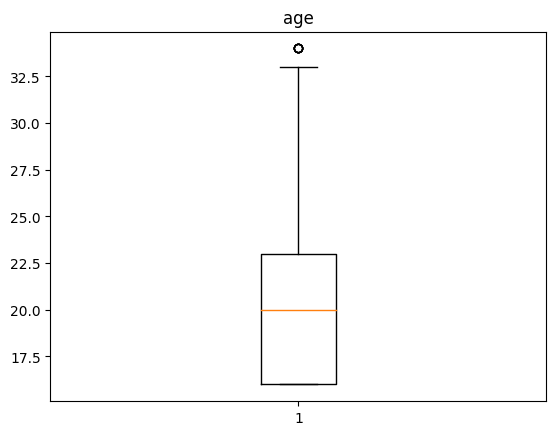

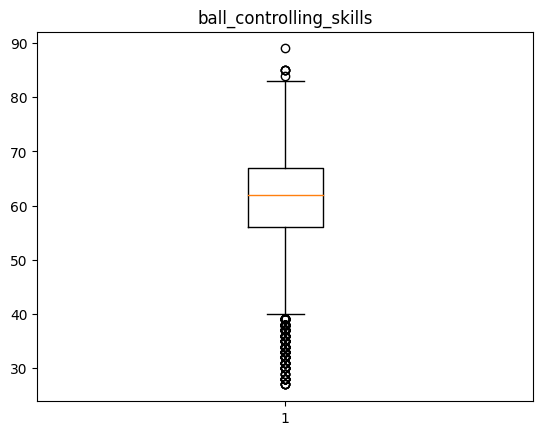

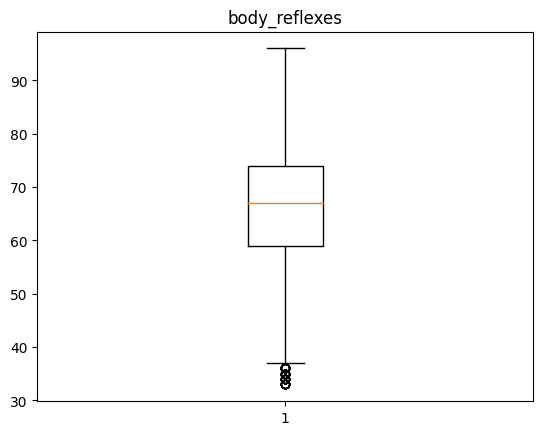

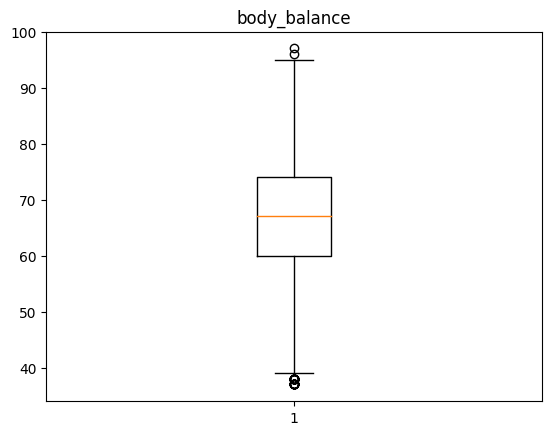

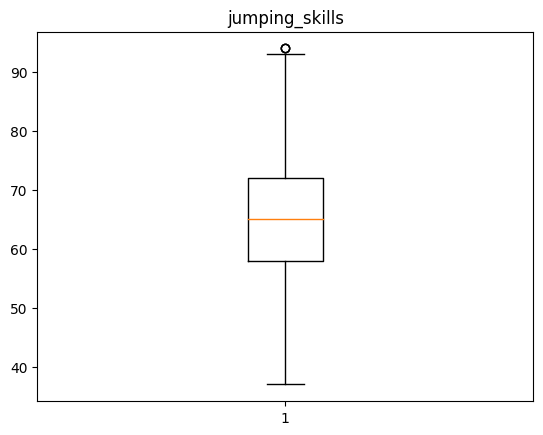

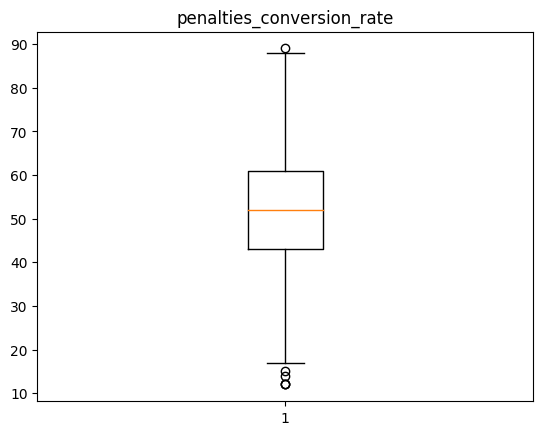

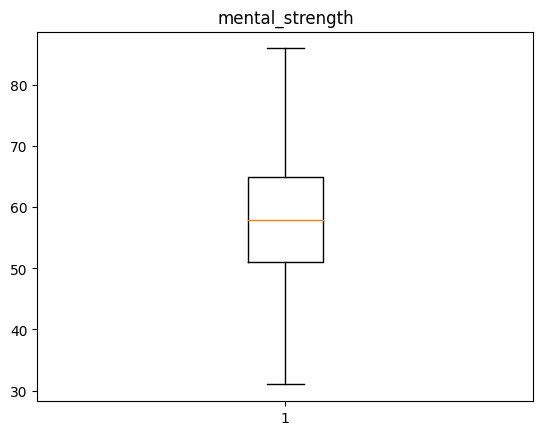

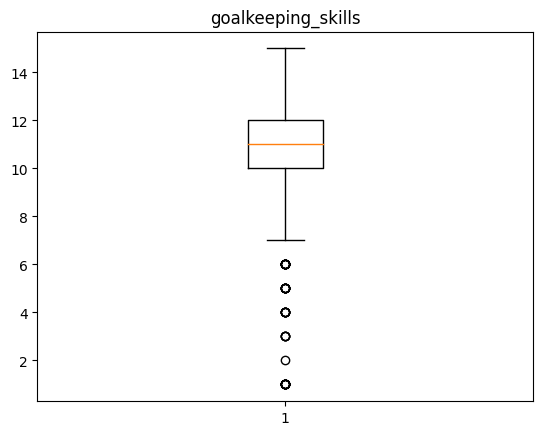

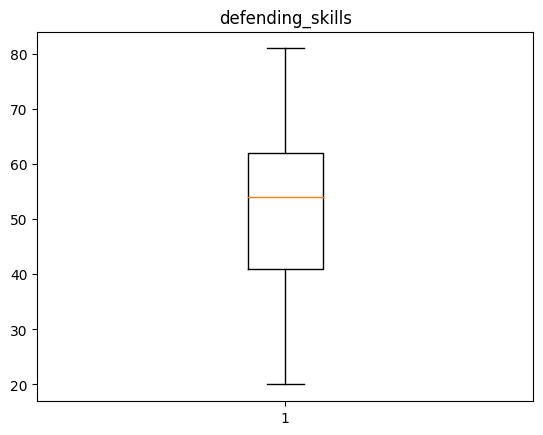

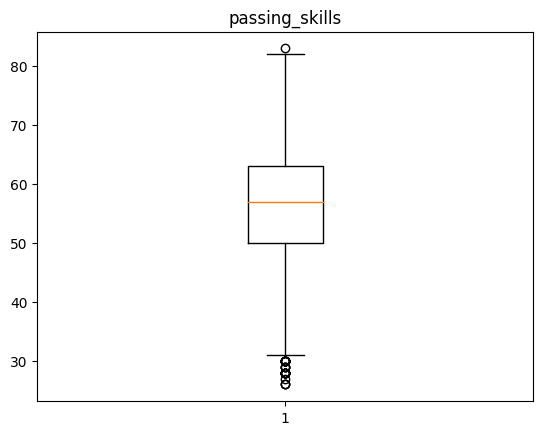

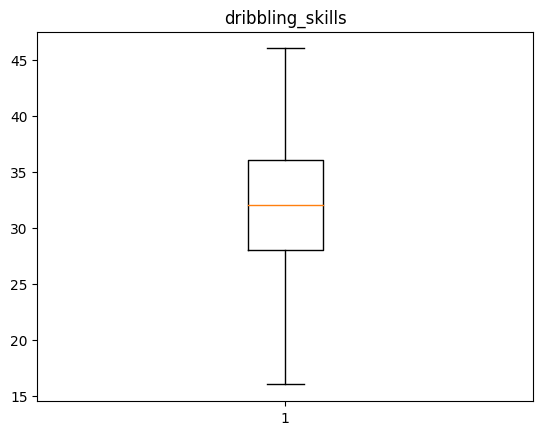

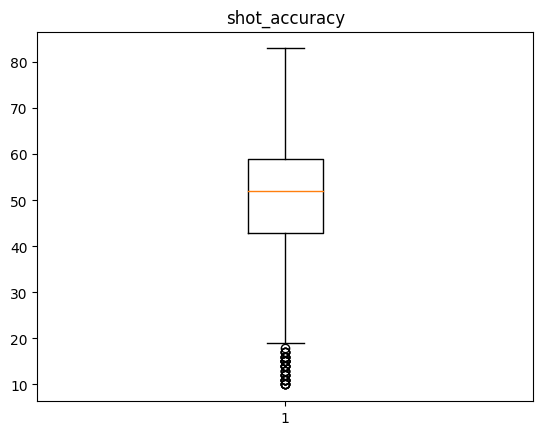

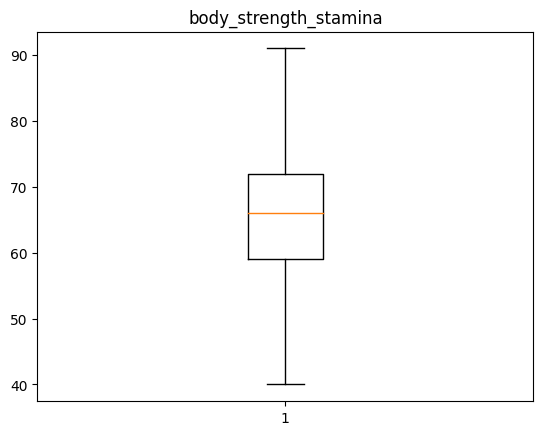

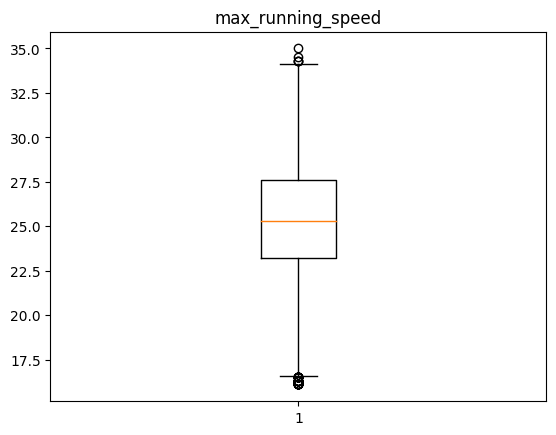

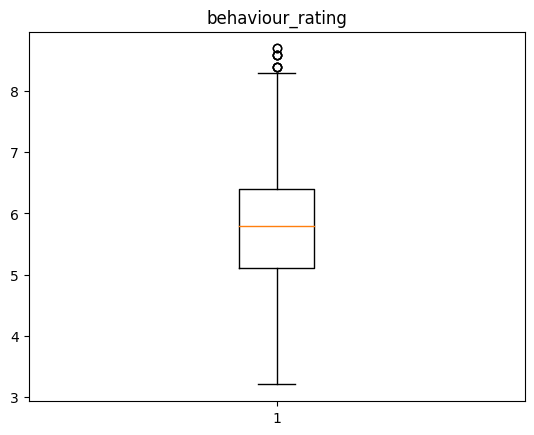

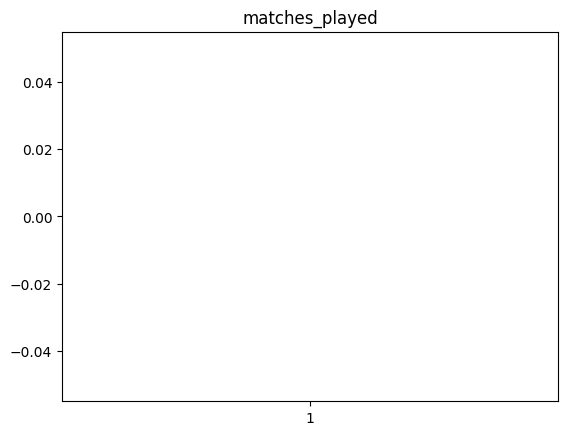

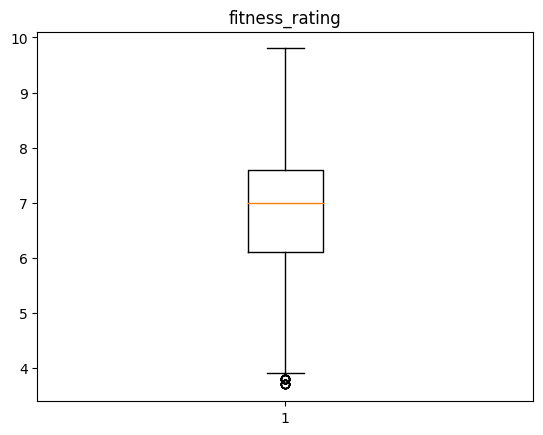

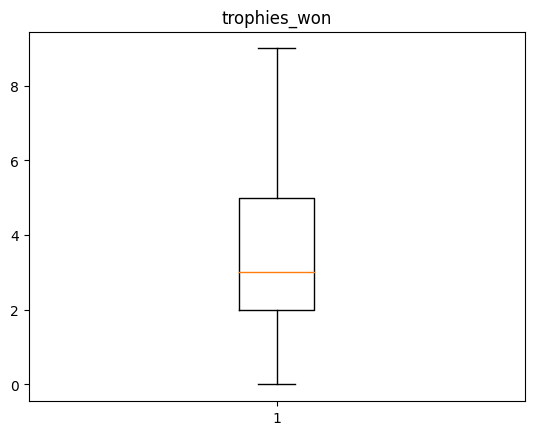

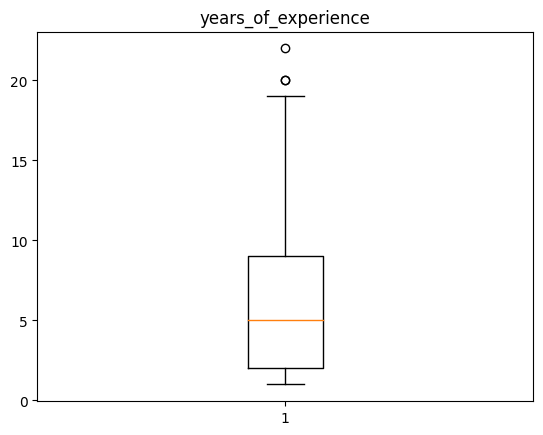

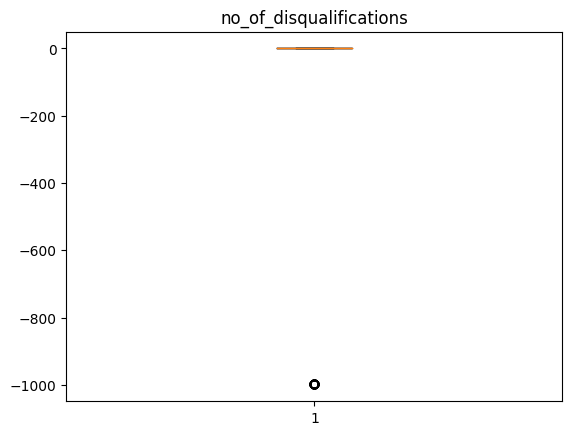

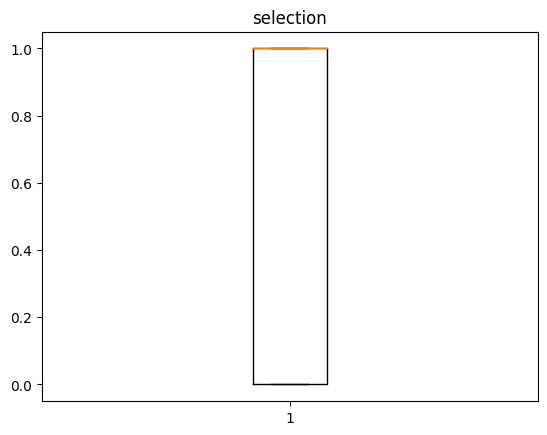

In [ ]:
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data["player_id"] = le.fit_transform(data["player_id"])
data["name"] = le.fit_transform(data["name"])
data["gender"] = le.fit_transform(data["gender"])
data["country"] = le.fit_transform(data["country"])
data["height"] = le.fit_transform(data["height"])
data["weight"] = le.fit_transform(data["weight"])
data["strong_foot"] = le.fit_transform(data["strong_foot"])
data["dedication_level"] = le.fit_transform(data["dedication_level"])
data["coaching"] = le.fit_transform(data["coaching"])

In [ ]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,10668,6968,23,1,153,18,47,77.0,58.0,47.0,...,3,7.7,0.0,8.1,2.0,0,2,8.0,0.0,1
1,829,5404,18,1,124,5,24,54.0,69.0,70.0,...,0,5.3,0.0,8.1,3.0,2,1,3.0,0.0,0
2,6136,3518,16,0,135,18,44,34.0,43.0,45.0,...,1,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1
3,5018,649,27,1,28,6,38,79.0,73.0,76.0,...,3,8.6,113.0,8.6,6.0,2,0,13.0,16.0,1
4,13765,6218,19,0,5,13,32,47.0,61.0,74.0,...,3,8.6,0.0,5.7,5.0,2,0,4.0,0.0,0


In [ ]:
data["matches_played"].unique()

array([  0., 113.,   1.,  39.,  38.,  75.,  37.,  36.,  76.,  74.,  73.,
       150., 112., 149., 110., 151., 111., 148.])

In [ ]:
y = data["selection"]
x = data.drop(["selection"],axis=1)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred_lr = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
confusion_matrix(y_test,pred_lr)

array([[ 726,  560],
       [ 355, 1158]])

In [ ]:
pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print('Accuracy =',accuracy_score(y_test,pred_lr))

Accuracy = 0.6730975348338692


In [ ]:
print('Precision =',precision_score(y_test,pred_lr))

Precision = 0.6740395809080326


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k = []
neighbors = np.arange(3,15)

In [ ]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

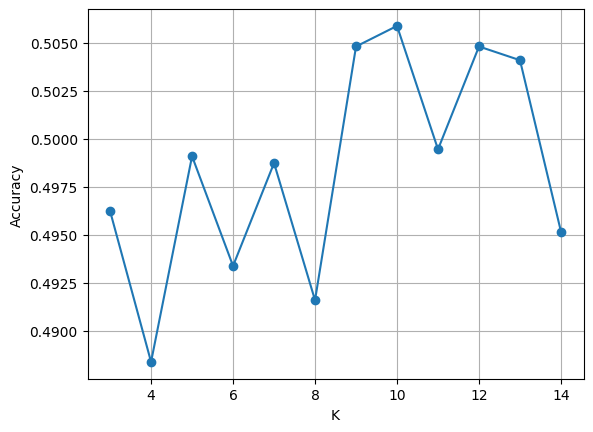

In [ ]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[620, 666],
       [717, 796]])

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 0.5058949624866024


In [ ]:
print('Precision =',precision_score(y_test,y_pred))

Precision = 0.5444596443228454


### SVM

In [ ]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_svm)

In [ ]:
accuracy_score(y_test,y_pred_svm)

In [ ]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_svm)

In [ ]:
accuracy_score(y_test,y_pred_svm)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
model=dt_cls.fit(x_train,y_train)
y_pred_dt=model.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_dt)

In [ ]:
accuracy_score(y_test,y_pred_dt)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf)

In [ ]:
accuracy_score(y_test,y_pred_rf)